<a href="https://colab.research.google.com/github/PavanChintha/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

Things covered in this tutorial

* Introduction 
* Classification based on Logistic Regression
* Regularization

#Definition
Logistic regression is a technique for modelling the probability of an event. Just like linear regression, it helps you understand the relationship between one or more variables and a target variable, except that, in this case, our target variable is categorical in nature.

The structure of a logistic regression is also similar to that of a linear regression model: you have a set of explanatory variables (X1, X2…) and our target binary variable (Y).

Linear Regression Equation:

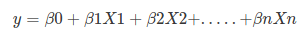

Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables.

Sigmoid Function:

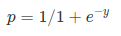

Apply Sigmoid function on linear regression:

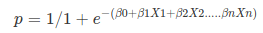

Ref: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

## Types of Logistic Regression

Logistic Regression can be divided into types based on the type of classification it does.

1. Binary Logistic Regression
2. Multinomial Logistic Regression
3. Ordinal Logistic Regression
 

### Binary Logistic Regression

Binary Logistic Regression is the most commonly used type. It is the type we already discussed when defining Logistic Regression. In this type, the dependent/target variable has two distinct values, either 0 or 1, malignant or benign, passed or failed, admitted or not admitted.


### Multinomial Logistic Regression

Multinomial Logistic Regression deals with cases when the target or independent variable has three or more possible values. For example, the use of Chest X-ray images as features that give indication about one of the three possible outcomes (No disease, Viral Pneumonia, COVID-19). The multinomial Logistic Regression will use the features to classify the example into one of the three possible outcomes in this case. There can of course be more than three possible values of the target variable.


### Ordinal Logistic Regression

Ordinal Logistic Regression is used in cases when the target variable is of ordinal nature. In this type, the categories are ordered in a meaningful manner and each category has quantitative significance. Moreover, the target variable has more than two categories. For example, the grades obtained on an exam have categories that have quantitative significance and they are ordered. Keeping it simple, the grades can be A, B, or C.

 

In logistic regression, we want our model to predict the probability of an observation belonging to a certain class or label. As such, we want a hypothesis h that satisfies the following condition 0 <= h(x) <= 1 , where x is an observation.
We define h(x) = g(wᵀ* x) , where g is a sigmoid function and w are the trainable parameters. As such, we have:

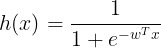


If the class label is y, the cost (error) associated with an observation x is given by:

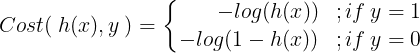

Cost Function: Thus, the total cost for all the m observations in a dataset is:

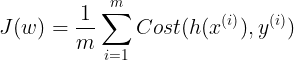


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.metrics import accuracy_score 

#Data
Dataset contains scores of candidates for exam1 and exam2 and whether they got admission on the basis of them or not.


In [ ]:
# data
!wget https://raw.githubusercontent.com/bmarroc/machine-learning/main/5/ex2data1.txt

--2022-03-03 11:41:32--  https://raw.githubusercontent.com/bmarroc/machine-learning/main/5/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.3’

ex2data1.txt.3      100%[===================>]   3.69K  --.-KB/s    in 0s      

2022-03-03 11:41:32 (42.6 MB/s) - ‘ex2data1.txt.3’ saved [3775/3775]



In [ ]:
data = pd.read_table('ex2data1.txt', sep=',', header=None, names=['exam1_score', 'exam2_score', 'admitted'], dtype=np.float32)
data

,exam1_score,exam2_score,admitted
0,34.623661,78.024696,0.0
1,30.286711,43.894997,0.0
2,35.847408,72.902199,0.0
3,60.182598,86.308556,1.0
4,79.032738,75.344376,1.0
...,...,...,...
95,83.489166,48.380287,1.0
96,42.261700,87.103851,1.0
97,99.315010,68.775406,1.0
98,55.340019,64.931938,1.0


In [ ]:
X_train = data.loc[:,['exam1_score','exam2_score']].values
Y_train = data.loc[:,['admitted']].values

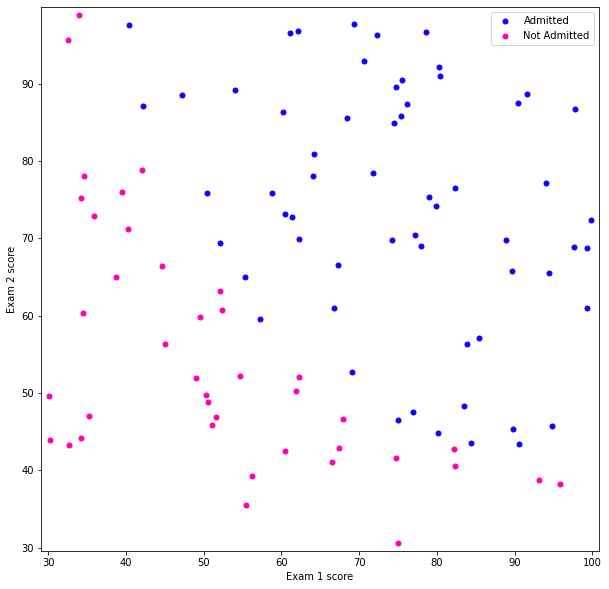

In [ ]:
# Plot data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.axis([np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., np.min(X_train[:,1])-1., np.max(X_train[:,1])+1.])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')

pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Admitted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Admitted')
ax.legend()

#Binary Logistic Regression
We can use Scikit-Learn's LogisitcRegression estimator to fit this data and construct the best-fit line:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [ ]:
model = LogisticRegression(penalty='none', max_iter=500, solver='lbfgs')
model.fit(X_train, Y_train.flatten())

Y_pred = model.predict_proba(X_train)
print("Y_pred:",Y_pred)

Y_pred: [[9.08967022e-01 9.10329784e-02]
 [9.99957742e-01 4.22577447e-05]
 [9.56091685e-01 4.39083154e-02]
 [9.57523473e-03 9.90424765e-01]
 [1.80122424e-03 9.98198776e-01]
 [9.89202601e-01 1.07973992e-02]
 [1.02185038e-03 9.98978150e-01]
 [5.76773127e-01 4.23226873e-01]
 [2.89975510e-04 9.99710024e-01]
 [2.64610946e-01 7.35389054e-01]
 [9.03247784e-02 9.09675222e-01]
 [9.71403403e-01 2.85965969e-02]
 [7.29845807e-04 9.99270154e-01]
 [1.46052764e-04 9.99853947e-01]
 [8.43964274e-01 1.56035726e-01]
 [1.90405817e-02 9.80959418e-01]
 [5.72283270e-01 4.27716730e-01]
 [8.51211350e-01 1.48788650e-01]
 [2.93452625e-04 9.99706547e-01]
 [4.25718925e-01 5.74281075e-01]
 [9.33165356e-01 6.68346442e-02]
 [1.37273433e-03 9.98627266e-01]
 [9.92582070e-01 7.41792996e-03]
 [9.99898847e-01 1.01152815e-04]
 [8.12166064e-03 9.91878339e-01]
 [1.44951085e-01 8.55048915e-01]
 [3.99700778e-01 6.00299222e-01]
 [1.34814215e-01 8.65185785e-01]
 [9.07611218e-01 9.23887818e-02]
 [9.83171322e-01 1.68286776e-02]
 [

In [ ]:
Y_pred_label = model.predict(X_train)
print("predicted label",Y_pred_label)

predicted label [0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1.]


Using Log loss, aka logistic loss or cross-entropy loss.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [ ]:
log_loss(Y_train, Y_pred)

0.20349770729398992

In [ ]:
accuracy_score(Y_train, Y_pred_label)

0.89

In this way, we can use the single ``LogisticRegression`` estimator to decide a proper fit to the decision boundary so that we will be able to predict which class a new data will correspond to. 



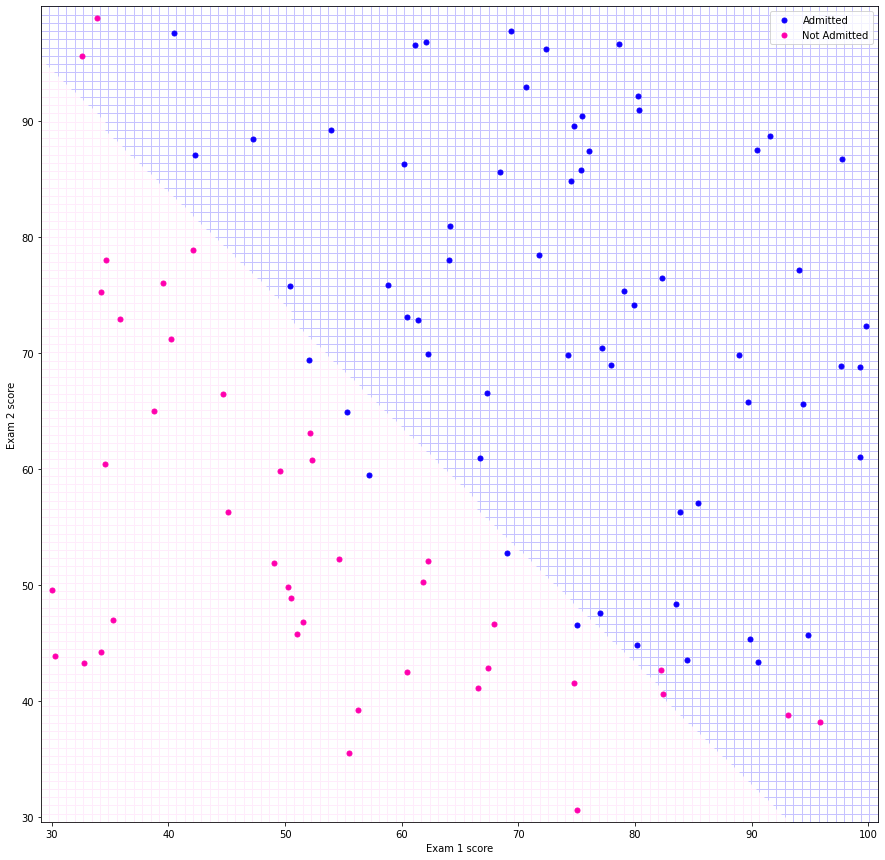

In [ ]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., np.min(X_train[:,1])-1., np.max(X_train[:,1])+1.])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-1., np.max(X_train[:,0])+1., 100)
v = np.linspace(np.min(X_train[:,1])-1., np.max(X_train[:,1])+1., 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Admitted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Admitted')
ax.legend()

### Regularization

Regularization is a technique to solve the problem of overfitting in a machine learning algorithm by penalizing the cost function. It does so by using an additional penalty term in the cost function.
There are two types of regularization techniques:
* Lasso or L1 Regularization
* Ridge or L2 Regularization

New cost function with L1 Regularization: 
$ J(w) = \frac{1}{m}  \sum_{i=1}^{m} Cost(h(x^{(i)}, y^{(i)})	+ \frac{\lambda}{m} \sum_{j=1}^{n}|w_j|$

New cost function with L2 Regularization: $ J(w) = \frac{1}{m}  \sum_{i=1}^{m} Cost(h(x^{(i)}, y^{(i)})	+ \frac{\lambda}{2m} \sum_{j=1}^{n}w_j^2$


λ is called the regularization parameter. It controls the trade-off between two goals: fitting the training data well vs keeping the params small to avoid overfitting.


## Example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss 
from sklearn.metrics import accuracy_score 

###Data

In [ ]:
!wget https://raw.githubusercontent.com/bmarroc/machine-learning/main/8/ex2data2.txt

--2022-03-03 11:41:38--  https://raw.githubusercontent.com/bmarroc/machine-learning/main/8/ex2data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [text/plain]
Saving to: ‘ex2data2.txt.2’

ex2data2.txt.2      100%[===================>]   2.18K  --.-KB/s    in 0s      

2022-03-03 11:41:38 (24.7 MB/s) - ‘ex2data2.txt.2’ saved [2233/2233]



In [ ]:
data = pd.read_table('ex2data2.txt', sep=',', header=None, names=['microchip_test1', 'microchip_test2', 'accepted'], dtype=np.float32)
data = shuffle(data).reset_index(drop=True)
data

,microchip_test1,microchip_test2,accepted
0,-0.092742,0.55336,1.0
1,-0.046659,-0.57968,0.0
2,0.057028,0.91886,0.0
3,0.149190,-0.57968,0.0
4,-0.081221,1.10890,0.0
...,...,...,...
113,0.851960,-0.36769,0.0
114,0.322000,0.69225,1.0
115,-0.438360,0.21711,1.0
116,-0.467170,-0.13377,0.0


In [ ]:
X_train = data.loc[:95,['microchip_test1', 'microchip_test2']].values
Y_train = data.loc[:95,['accepted']].values

X_test = data.loc[95:,['microchip_test1', 'microchip_test2']].values
Y_test = data.loc[95:,['accepted']].values

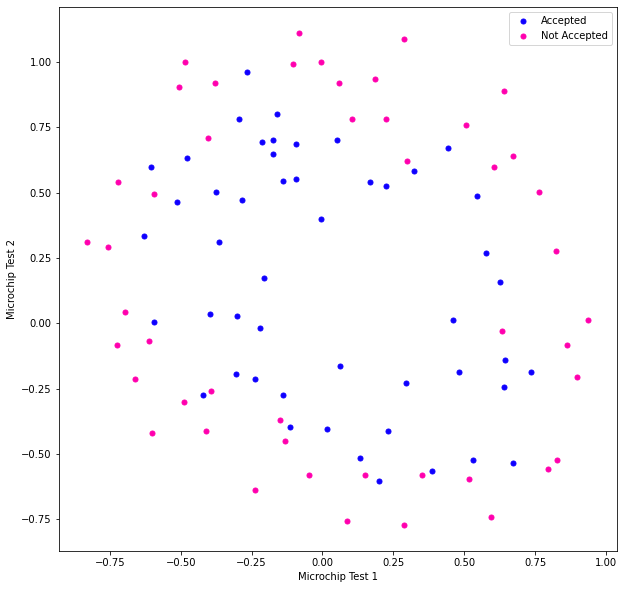

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()

### Without regularization:
Having nonlinear relationships between variables is to transform the data according to basis functions.

Let us consider degree-2 polynomial features of X1 and X2.
Consider the following variables: X1, X1², X2, X2², X1*X2. Since the second-order terms are significant, we can’t fit a simple linear classification.
Besides, the logistic model with higher terms performs better than the simple model, as shown further in the plot.
To play a safe card, let’s try a logistic model with 6-th degree polynomials without any interaction terms.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html


In [ ]:
model = Pipeline([('pf', PolynomialFeatures(degree=6, include_bias=False)),
                  ('lr', LogisticRegression(penalty='none', max_iter=10000, solver='sag'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(steps=[('pf', PolynomialFeatures(degree=6, include_bias=False)),
                ('lr',
                 LogisticRegression(max_iter=10000, penalty='none',
                                    solver='sag'))])

In [ ]:
Y_pred = model.predict_proba(X_train)

print(log_loss(Y_train, Y_pred))
print(log_loss(Y_test, model.predict_proba(X_test)))

0.24979576155887262
0.6497014764410739


In [ ]:
Y_pred_label = model.predict(X_train)

print(accuracy_score(Y_train, Y_pred_label))
print(accuracy_score(Y_test, model.predict(X_test)))

0.8958333333333334
0.782608695652174


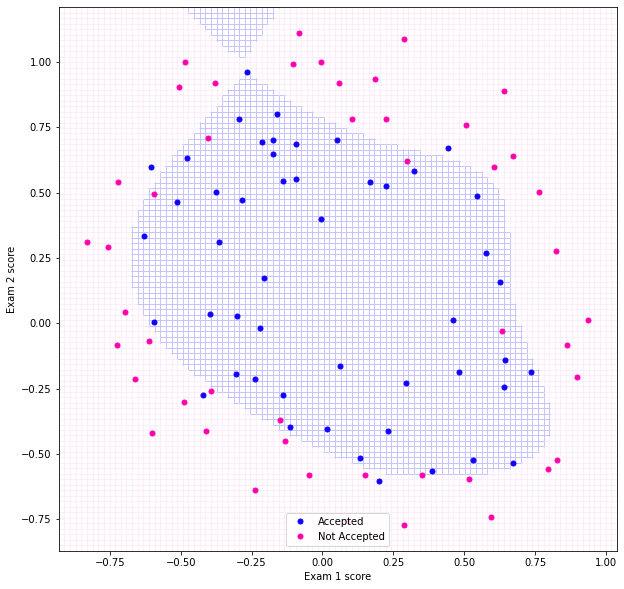

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()

### With Regularization

Modifying the error function so that model complexity is also explicitly penalized. Here we have shown an example of how L2 norm is helping generalise the model. 

In [ ]:
model = Pipeline([('pf', PolynomialFeatures(degree=6, include_bias=False)),
                  ('lr', LogisticRegression(penalty='l2', C=1/1., max_iter=10000, solver='sag'))])
                  
model.fit(X_train, Y_train.flatten()) 

Pipeline(steps=[('pf', PolynomialFeatures(degree=6, include_bias=False)),
                ('lr', LogisticRegression(max_iter=10000, solver='sag'))])

In [ ]:
Y_pred = model.predict_proba(X_train)

print(log_loss(Y_train, Y_pred))
print(log_loss(Y_test, model.predict_proba(X_test)))

0.47664939881845686
0.47451124850498594


In [ ]:
Y_pred_label = model.predict(X_train)

print(accuracy_score(Y_train, Y_pred_label))
print(accuracy_score(Y_test, model.predict(X_test)))

0.8645833333333334
0.782608695652174


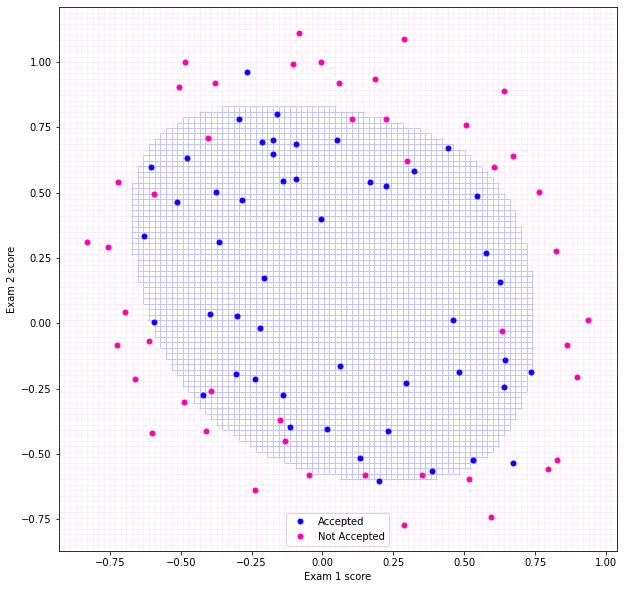

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.axis([np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1])
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
u = np.linspace(np.min(X_train[:,0])-0.1, np.max(X_train[:,0])+0.1, 100)
v = np.linspace(np.min(X_train[:,1])-0.1, np.max(X_train[:,1])+0.1, 100)
z = []
for i in range(100):
    for j in range(100):
        z.append([u[i], v[j]])
z = np.array(z)
w = model.predict(z)
model_pos = np.where(w == 1)[0]
model_neg = np.where(w == 0)[0]
ax.plot(z[model_pos,0], z[model_pos,1], marker='+', color='#C7C3FF', markersize=10, linestyle='')
ax.plot(z[model_neg,0], z[model_neg,1], marker='+', color='#FFECFB', markersize=10, linestyle='')
pos = np.where(Y_train[:,0] == 1)[0]
neg = np.where(Y_train[:,0] == 0)[0]
ax.plot(X_train[pos,0], X_train[pos,1], marker='.', color='#0F00FF', markersize=10, linestyle='', label='Accepted') 
ax.plot(X_train[neg,0], X_train[neg,1], marker='.', color='#FF00AE', markersize=10, linestyle='', label='Not Accepted')
ax.legend()